In [2]:
from __future__ import division
import sys
import glob, os, gc
import uuid
import os.path
import csv
import numpy as np
from time import time
from subprocess import (call, Popen, PIPE)
from itertools import product
import shutil
import re
import pickle
from boto3.session import Session
import boto3
import h5py
import umap
import hdbscan
import matplotlib.pyplot as plt




##Path to Data
basepath = "/home/ubuntu/"
with open(os.path.join(basepath,"config.txt")) as f:
    config = [line.rstrip() for line in f]    

session = Session(aws_access_key_id=config[0],aws_secret_access_key=config[1])
s3 = session.resource('s3') 

In [3]:
s3.meta.client.download_file('bsmn-data',os.path.join('Training_UMAP_HDB_2Set.h5'),os.path.join(basepath,'Training_UMAP_HDB_2Set.h5'))
hf = h5py.File(os.path.join(basepath,'Training_UMAP_HDB_2Set.h5'),'r')
Train_Z = hf['Z'][()] 
Train_C = hf['C'][()]
Train_Y = hf['Y'][()]
embedding_partialsupervised_1 = hf['embedding_partialsupervised_1'][()]
embedding_partialsupervised_2 = hf['embedding_partialsupervised_2'][()]
HDB_1 = hf['HDB_1'][()]
HDB_2 = hf['HDB_2'][()]
set1 = hf['set1'][()]
set2 = hf['set2'][()]
hf.close()

In [7]:
vals = np.linspace(0,1,42)
np.random.shuffle(vals)
cmap50 = plt.cm.colors.ListedColormap(plt.cm.nipy_spectral(vals))

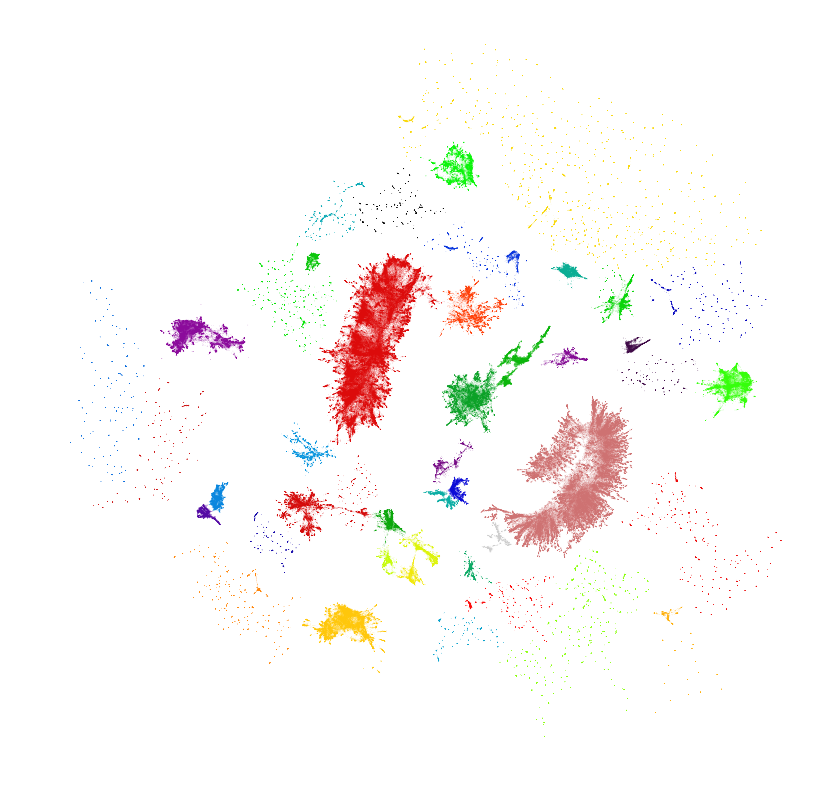

In [8]:
import matplotlib.pyplot as plt
clustered = (HDB_1 >= 0)
%matplotlib inline
f = plt.figure(figsize=(14, 14))
ax = plt.subplot(aspect='equal')
plt.scatter(embedding_partialsupervised_1[clustered, 0],
            embedding_partialsupervised_1[clustered, 1],
            c=HDB_1[clustered],
            s=0.1,
            cmap=cmap50, lw=0);
plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')
plt.savefig('fig1.pdf') 

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline
import seaborn as sns

def scatter(x, colors):
    f = plt.figure(figsize=(14, 14))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], s=.1, c=colors, cmap=cmap50, lw=0)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(43):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=12)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

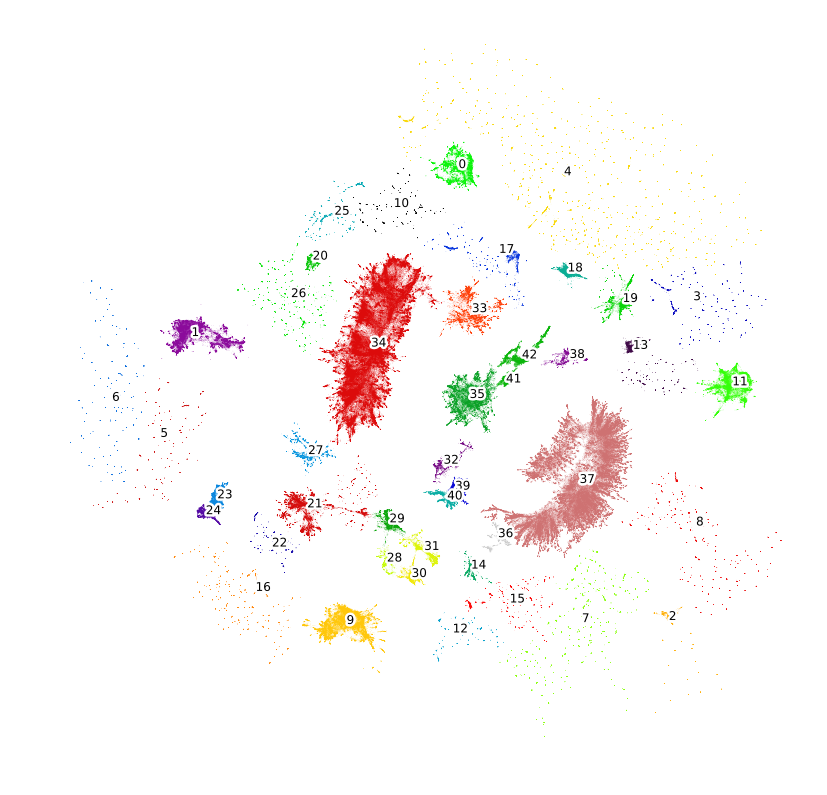

In [10]:
scatter(embedding_partialsupervised_1[clustered, :], HDB_1[clustered])
plt.savefig('fig1_labeled.pdf')

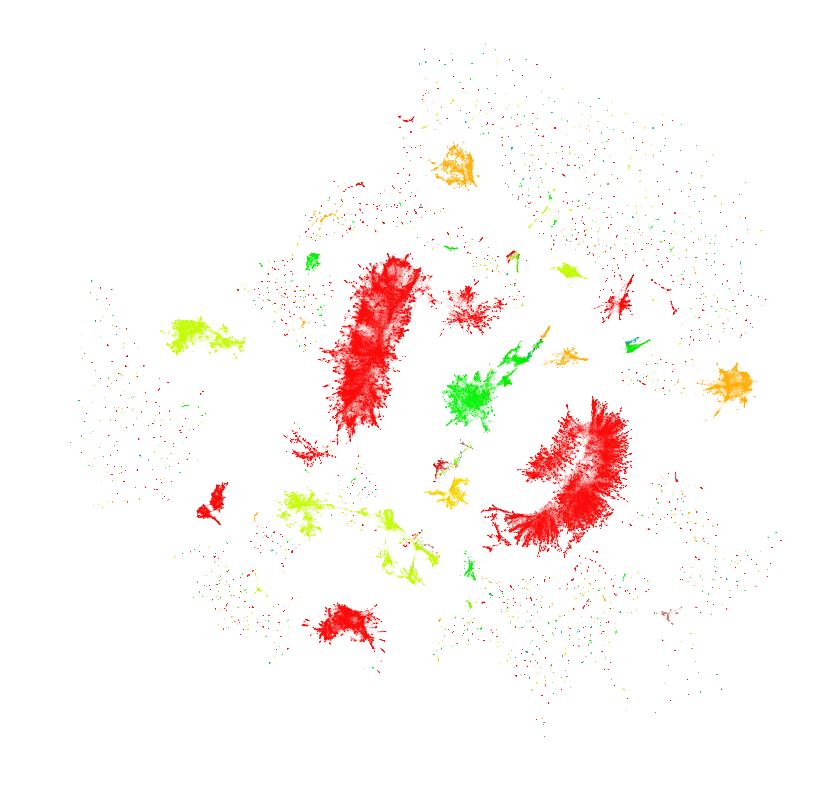

In [11]:
import matplotlib.pyplot as plt
clustered = (HDB_1 >= 0)
%matplotlib inline
f = plt.figure(figsize=(14, 14))
ax = plt.subplot(aspect='equal')

plt.scatter(embedding_partialsupervised_1[clustered, 0],
            embedding_partialsupervised_1[clustered, 1],
            c=Train_C[set1[clustered]],
            s=0.1,
            cmap=cmap50, lw=0);
plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')
plt.savefig('fig2.pdf') 

In [4]:
SubLabels_1 = [None] * len(embedding_partialsupervised_1)
Train_C_1 = Train_C[set1]
for i in range(len(embedding_partialsupervised_1)):
    l1 = HDB_1[i]
    l2 = Train_C_1[i]
    if l1 != -1:
        SubLabels_1[i] = str(l2)+"_"+str(l1)
    else:
        SubLabels_1[i] = "-1"  
Final_1 = dict([(y,x+1) for x,y in enumerate(sorted(set(SubLabels_1[:])))])
New_1 = [Final_1[x] for x in SubLabels_1[:]]      



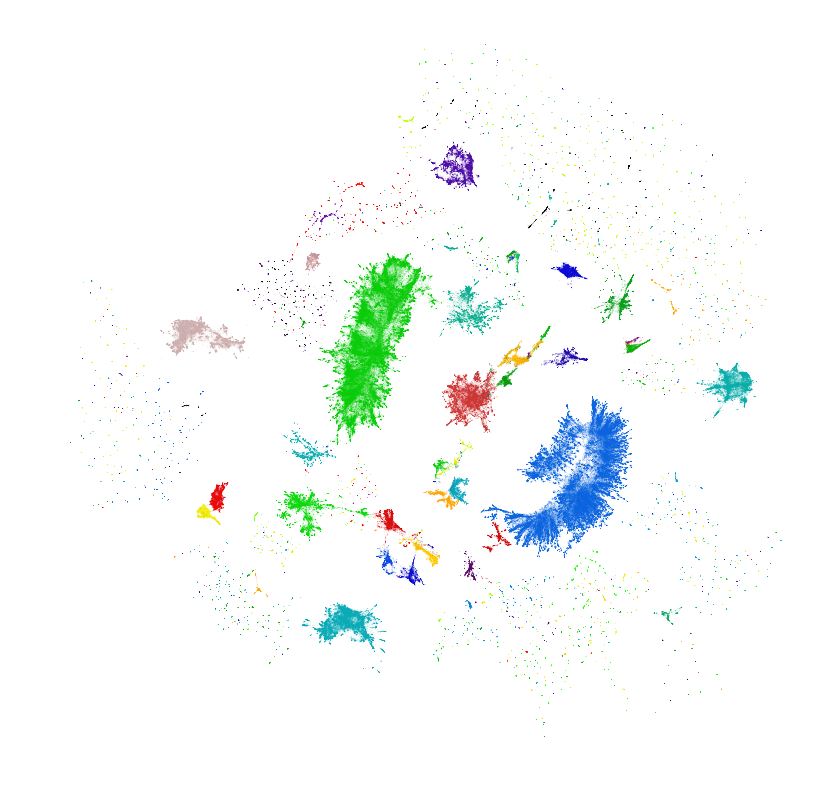

In [13]:
vals1 = np.linspace(0,1,max(New_1))
np.random.shuffle(vals1)
cmap1 = plt.cm.colors.ListedColormap(plt.cm.nipy_spectral(vals1))

import matplotlib.pyplot as plt
clustered = (HDB_1 >= 0)
%matplotlib inline
f = plt.figure(figsize=(14, 14))
ax = plt.subplot(aspect='equal')

plt.scatter(embedding_partialsupervised_1[clustered, 0],
            embedding_partialsupervised_1[clustered, 1],
            c=np.array(New_1)[clustered],
            cmap=cmap1,
            s=0.1, lw=0);
plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')
plt.savefig('fig3.pdf') 

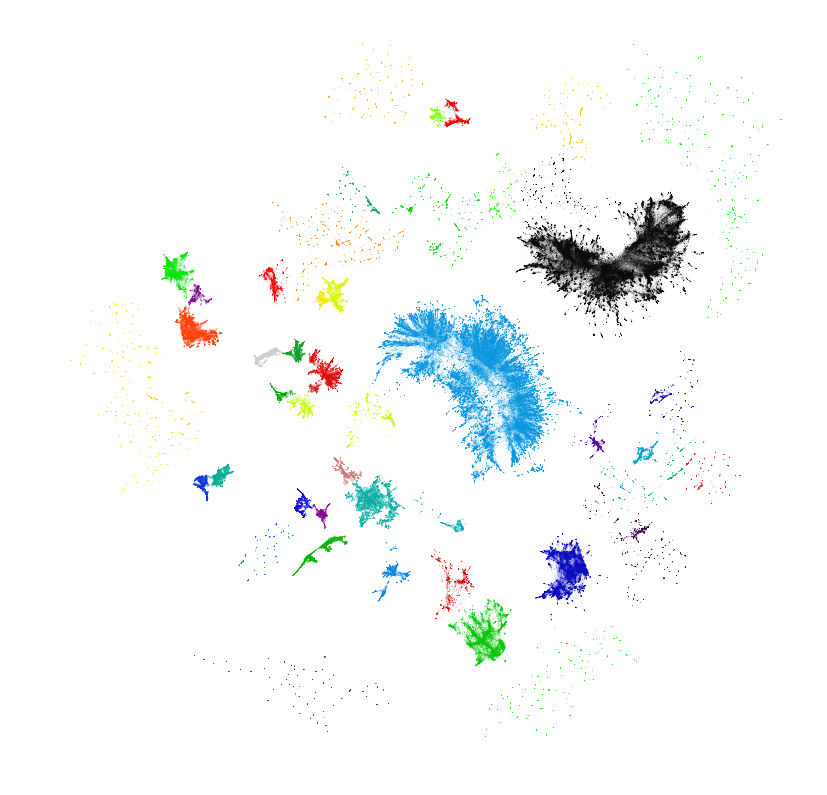

In [14]:
import matplotlib.pyplot as plt
clustered = (HDB_2 >= 0)
%matplotlib inline
f = plt.figure(figsize=(14, 14))
ax = plt.subplot(aspect='equal')

plt.scatter(embedding_partialsupervised_2[clustered, 0],
            embedding_partialsupervised_2[clustered, 1],
            c=HDB_2[clustered],
            s=0.1,
            cmap=cmap50, lw=0);
plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')
plt.savefig('fig4.pdf')

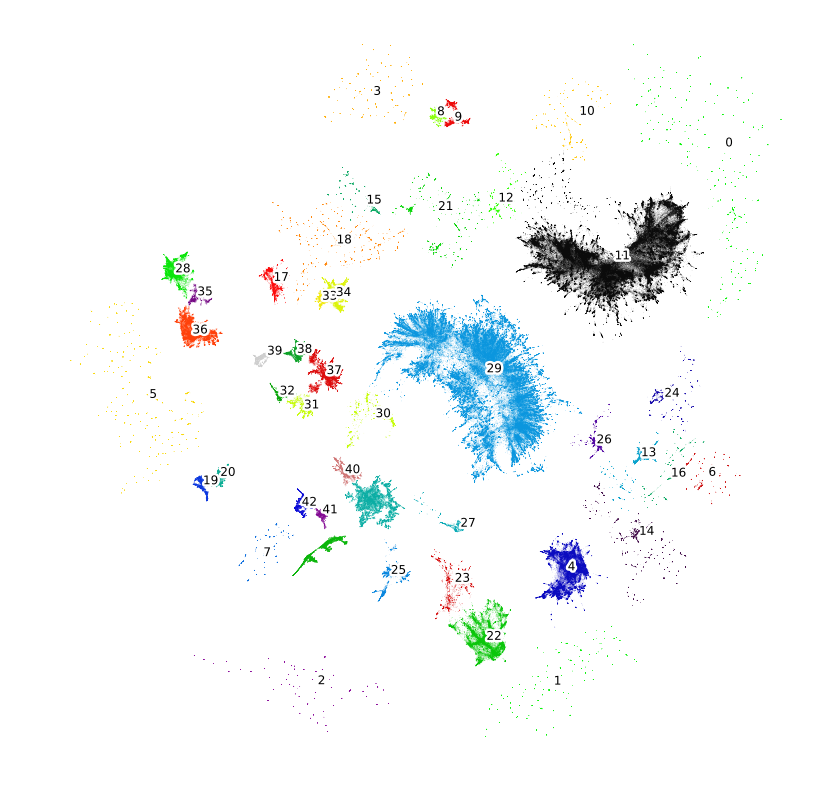

In [15]:
scatter(embedding_partialsupervised_2[clustered, :], HDB_2[clustered])
plt.savefig('fig4_labeled.pdf')

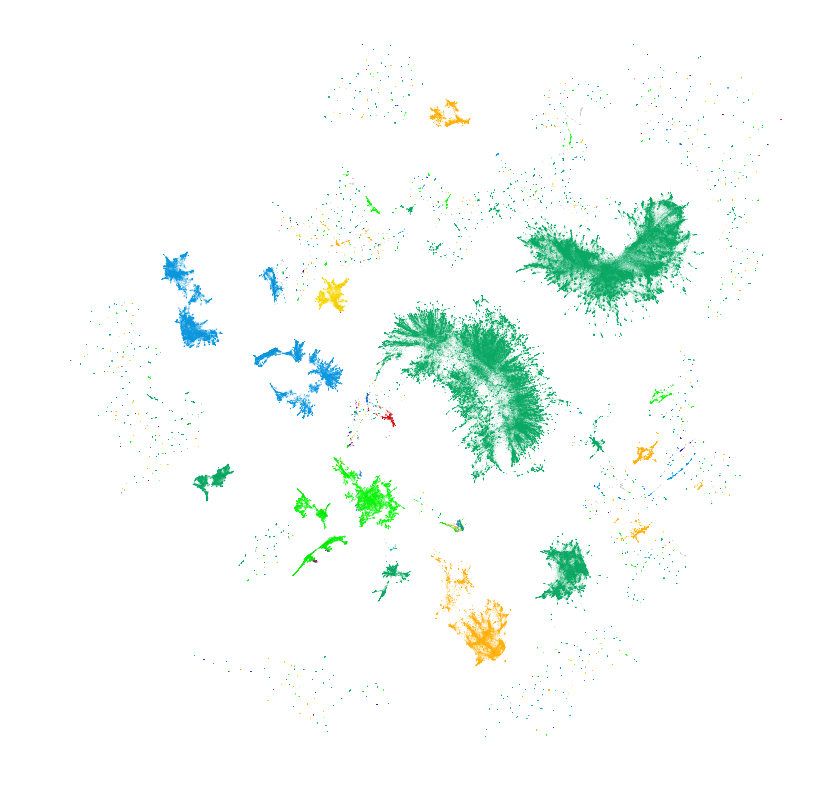

In [16]:
import matplotlib.pyplot as plt
clustered = (HDB_2 >= 0)
%matplotlib inline
f = plt.figure(figsize=(14, 14))
ax = plt.subplot(aspect='equal')

plt.scatter(embedding_partialsupervised_2[clustered, 0],
            embedding_partialsupervised_2[clustered, 1],
            c=Train_C[set2[clustered]],
            s=0.1,
            cmap=cmap50, lw=0);
plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')
plt.savefig('fig5.pdf') 

In [5]:
SubLabels_2 = [None] * len(embedding_partialsupervised_2)
Train_C_2 = Train_C[set2]
for i in range(len(embedding_partialsupervised_2)):
    l1 = HDB_2[i]
    l2 = Train_C_2[i]
    if l1 != -1:
        SubLabels_2[i] = str(l2)+"_"+str(l1)
    else:
        SubLabels_2[i] = "-1"  
Final_2 = dict([(y,x+1) for x,y in enumerate(sorted(set(SubLabels_2[:])))])
New_2 = [Final_2[x] for x in SubLabels_2[:]]      

vals2 = np.linspace(0,1,max(New_2))
np.random.shuffle(vals2)
cmap2 = plt.cm.colors.ListedColormap(plt.cm.nipy_spectral(vals2))

In [7]:
Final_2

{'-1': 1,
 '10_0': 2,
 '10_1': 3,
 '10_10': 4,
 '10_11': 5,
 '10_12': 6,
 '10_13': 7,
 '10_14': 8,
 '10_16': 9,
 '10_17': 10,
 '10_18': 11,
 '10_19': 12,
 '10_2': 13,
 '10_20': 14,
 '10_21': 15,
 '10_22': 16,
 '10_23': 17,
 '10_24': 18,
 '10_25': 19,
 '10_26': 20,
 '10_27': 21,
 '10_28': 22,
 '10_29': 23,
 '10_3': 24,
 '10_30': 25,
 '10_32': 26,
 '10_33': 27,
 '10_34': 28,
 '10_36': 29,
 '10_37': 30,
 '10_38': 31,
 '10_39': 32,
 '10_4': 33,
 '10_40': 34,
 '10_41': 35,
 '10_43': 36,
 '10_44': 37,
 '10_45': 38,
 '10_5': 39,
 '10_6': 40,
 '10_7': 41,
 '11_11': 42,
 '11_18': 43,
 '11_25': 44,
 '11_44': 45,
 '11_45': 46,
 '12_0': 47,
 '12_1': 48,
 '12_10': 49,
 '12_11': 50,
 '12_12': 51,
 '12_13': 52,
 '12_14': 53,
 '12_15': 54,
 '12_16': 55,
 '12_17': 56,
 '12_18': 57,
 '12_19': 58,
 '12_2': 59,
 '12_20': 60,
 '12_21': 61,
 '12_23': 62,
 '12_24': 63,
 '12_25': 64,
 '12_26': 65,
 '12_27': 66,
 '12_29': 67,
 '12_3': 68,
 '12_30': 69,
 '12_34': 70,
 '12_36': 71,
 '12_39': 72,
 '12_4': 73,
 '1

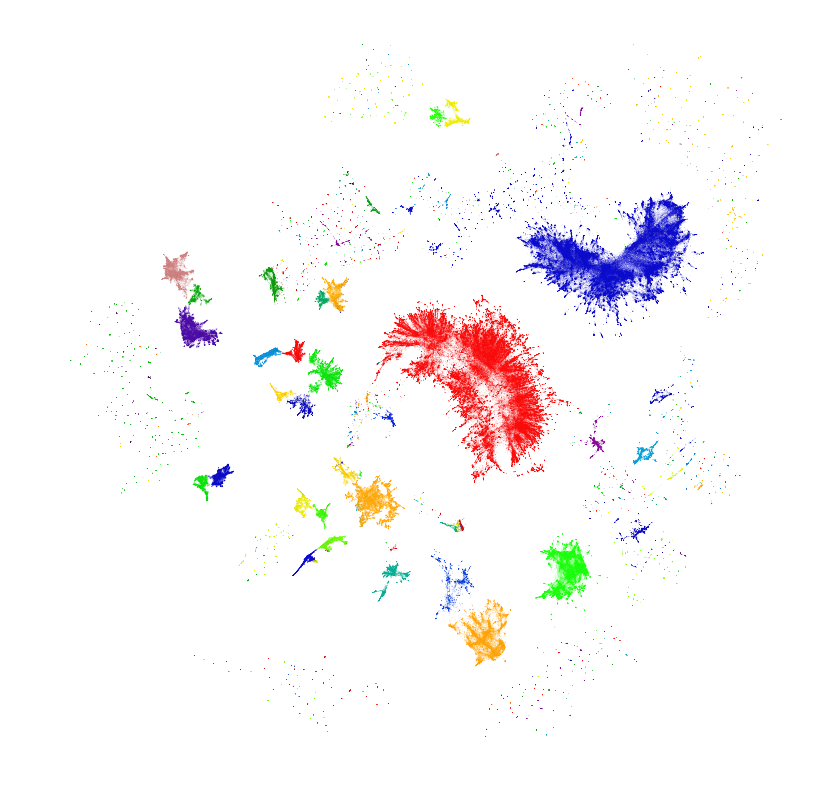

In [18]:
import matplotlib.pyplot as plt
clustered = (HDB_2 >= 0)
%matplotlib inline
f = plt.figure(figsize=(14, 14))
ax = plt.subplot(aspect='equal')

plt.scatter(embedding_partialsupervised_2[clustered, 0],
            embedding_partialsupervised_2[clustered, 1],
            c=np.array(New_2)[clustered],
            cmap=cmap2,
            s=0.1, lw=0);
plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')
plt.savefig('fig6.pdf') 

In [11]:
d1 = {'Labels':Train_C_1,'HDB':HDB_1}
d2 = {'Labels':Train_C_2,'HDB':HDB_2}

import pandas as pd

df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)

df1.to_csv('DataSet1.csv')
df2.to_csv('DataSet2.csv')

session = Session(aws_access_key_id=config[0],aws_secret_access_key=config[1])
s3 = session.resource('s3')
hf = h5py.File('Training_UMAP_HDB_Final.h5', 'w')
hf.create_dataset('Y', data=Train_Y)
hf.create_dataset('Z', data=Train_Z)
hf.create_dataset('C', data=Train_C)
hf.create_dataset('set1', data=set1)
hf.create_dataset('set2', data=set2)
hf.create_dataset('embedding_partialsupervised_1', data=embedding_partialsupervised_1)
hf.create_dataset('embedding_partialsupervised_2', data=embedding_partialsupervised_2)
hf.create_dataset('HDB_1', data=HDB_1)
hf.create_dataset('HDB_2', data=HDB_2)
hf.create_dataset('New_1', data=New_1)
hf.create_dataset('New_2', data=New_2)
hf.close()
s3.meta.client.upload_file(os.path.join('Training_UMAP_HDB_Final.h5'),'bsmn-data',os.path.join('Training_UMAP_HDB_Final.h5'))

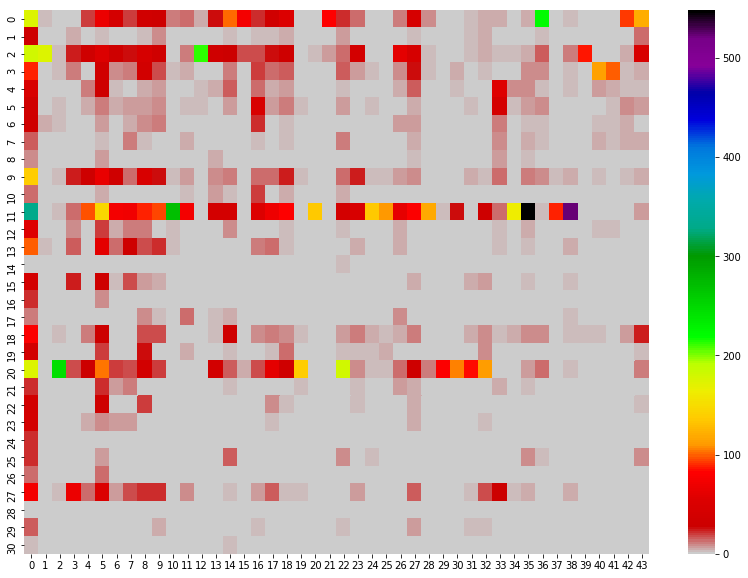

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(Train_C[set1], HDB_1)

fig, ax = plt.subplots(1, figsize=(14, 10))
sns.heatmap(np.sqrt(cf_matrix[2:33,:]), annot=False,cmap='nipy_spectral_r')
plt.savefig('fig7.pdf')

In [3]:
#!/home/ubuntu/miniconda2/bin/python

from __future__ import print_function
import glob, os, gc, sys
import os.path
import csv
import numpy as np
np.random.seed(1337)  # for reproducibility
from time import time
from subprocess import (call, Popen, PIPE)
from itertools import product
from IPython.display import display
from PIL import Image
from IPython.display import Image as IPImage
import shutil
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import uuid
import pickle
from boto3.session import Session
import boto3
import h5py

with open(os.path.join(basepath,"config.txt")) as f:
    config = [line.rstrip() for line in f]    

session = Session(aws_access_key_id=config[0],aws_secret_access_key=config[1])
s3 = session.resource('s3') 
s3.meta.client.download_file('bsmn-data',os.path.join('Training_UMAP_HDB_Final.h5'),os.path.join(basepath,'Training_UMAP_HDB_Final.h5'))
hf = h5py.File(os.path.join(basepath,'Training_UMAP_HDB_Final.h5'),'r')
Train_Z = hf['Z'][()] 
Train_C = hf['C'][()]
Train_Y = hf['Y'][()]
embedding_partialsupervised_1 = hf['embedding_partialsupervised_1'][()]
embedding_partialsupervised_2 = hf['embedding_partialsupervised_2'][()]
HDB_1 = hf['HDB_1'][()]
HDB_2 = hf['HDB_2'][()]
set1 = hf['set1'][()]
set2 = hf['set2'][()]
New_1 = hf['New_1'][()]
New_2 = hf['New_2'][()]

##Path to Data
Training = ["USD15","usd19","USD3","USD30","USD36","USD37","USH15","USH19","USH3","USH30","USH36","USH37"]

In [4]:
Classes1 = len(set(New_1))

#pull all cells per sample from Train_Y
L1 = len(New_1)
T1={}


#cell_id = Train_Y[i].strip().split('-')[0]


  

In [ ]:
for i in range(0, L1):
    print(i)
    position_key = Train_Y[set1][i]
    Y_Class1 = str(New_1[i])
    T1[position_key] = Y_Class1

In [12]:
l = np.array_split(np.array(range(L1)),20)
for i in l[0]:
    print(i)
    position_key = Train_Y[set1][i]
    Y_Class1 = str(New_1[i])
    T1[position_key] = Y_Class1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


KeyboardInterrupt: 

In [ ]:
Classes2 = len(set(New_2))

L2 = len(New_2)
T2={}

for i in range(0, L2):
    position_key = Train_Y[set2][i]
    Y_Class1 = str(New_2[i])
    T1[position_key] = Y_Class1  

In [ ]:
count = 0
for subject in Training:
    print(subject)
    session = Session(aws_access_key_id=config[0],aws_secret_access_key=config[1])
    s3 = session.resource('s3')
    s3 = boto3.client ('s3')
    s3.download_file('for-ndar',os.path.join("metadata/", subject + ".txt"),os.path.join(basepath,subject + ".txt"))

    with open(subject + ".txt") as f:
        Cells = [line.rstrip() for line in f]
    for cell in Cells:
        print(cell)
        cell_ids = []
        s3.meta.client.download_file('bsmn-data',os.path.join(subject, cell+'_IDs.h5'),os.path.join(basepath,cell+'_IDs.h5'))
        f = h5py.File(os.path.join(basepath,cell+'_IDs.h5'), 'r')
        os.remove(os.path.join(basepath,cell+'_IDs.h5'))
        cell_ids = f['ID']
        count = 0
        for cid in cell_ids:
            s3.meta.client.download_file('bsmn-data',os.path.join(subject, cell+'_'+cid+'.h5'), os.path.join(basepath,cell+'_'+cid+'.h5'))
            xyz = h5py.File(os.path.join(basepath,cell+'_'+cid+'.h5'), 'r')
            os.remove(os.path.join(basepath,cell+'_'+cid+'.h5'))
            if count == 0:
                X = xyz['X'][()]
                Y = xyz['Y'][()]
                count+=1
            else:
                X = np.append(X,xyz['X'][()], axis=0)
                Y = np.append(Y,xyz['Y'][()], axis=0)
        print(X.shape)
        Labels = [None] * len(Y)
        for i in range(0,len(Y)):
            if Y[i] in Train_Y[set1]:
                Labels1[i] = T1[Y[i]]
            else:
                Labels1[i] = "NotClassified"                    
        rm=[]
        for i in range(0,len(Labels1)):               
            if Labels1[i] == "NotClassified": 
                rm=np.append(rm,i)
        X = np.delete(X,rm,0)
        Labels1 = np.delete(Labels1,rm,0)
        Y = np.delete(Y,rm,0)
        for l in Labels1:
            if not os.path.exists(os.path.join(basepath,"Images",l)):
                os.makedirs(os.path.join(basepath,"Images",l),0755)           
        for i in range(0,len(Labels1)):
            im = Image.fromarray(np.uint8(X[i,:,:,:]*255),mode='RGB')
            im.save(os.path.join(basepath,"Images",Labels1[i],Y[i]))